<a href="https://colab.research.google.com/github/MohitS704/ParticleCoding/blob/main/supplementary_notebooks/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Let's make a basic plot for a sine curve. It's pretty simple - just a few lines:

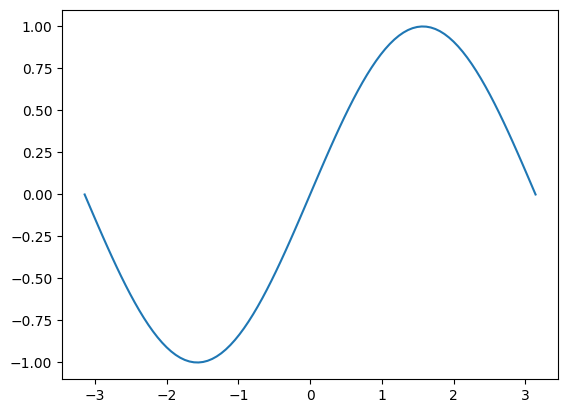

In [16]:
x = np.linspace(-np.pi, np.pi, 100) #This makes a bunch of evenly spaced points between -pi and pi
y = np.sin(x) #vectorized operation on the x array
plt.plot(x, y)
plt.show() #This line is not needed in a Jupyter notebook since plt.plot returns the whole object.
#However, in a real script, you have to explicitly either show or save the figure
#It's always good practice to do this

Okay - let's make a new plot with both cosine and sine

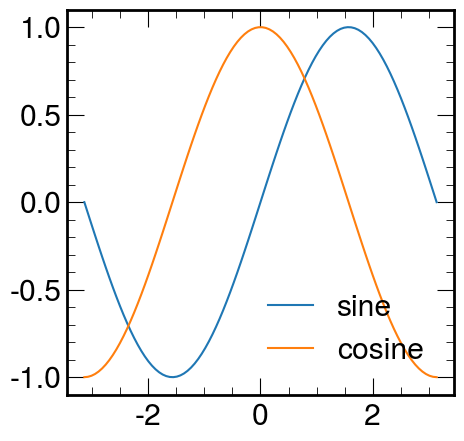

In [55]:
x = np.linspace(-np.pi, np.pi, 100) #This makes a bunch of evenly spaced points between -pi and pi
y1 = np.cos(x) #vectorized operation on the x array
plt.plot(x, y, label="sine")
plt.plot(x, y1, label="cosine")
plt.legend() #This will label the plots
plt.show()

See how the two plots were added to the same figure? In Jupyter notebooks figures are separate between each cell - but the same does not apply to scripts. What do I mean by this?

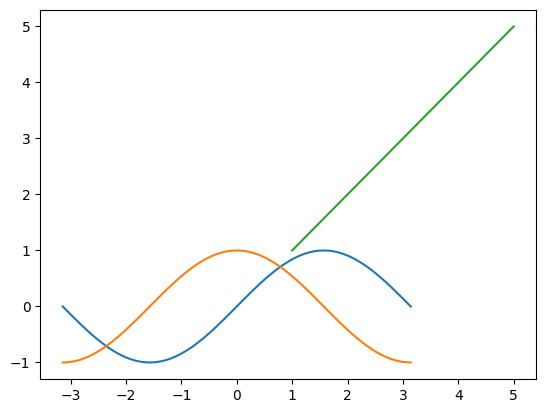

In [18]:
plt.plot(x, y)
plt.plot(x, y1) #This shows both plots
# I now want to make a separate plot!
plt.plot([1,2,3,4,5], [1,2,3,4,5])
plt.show()

matplotlib uses the _last_ opened figure by default. Should you want to plot something different you should either clear the plot by using `plt.cla()` or create a new figure using a variety of different options. Using `plt.show()` will also clear the figure being shown!

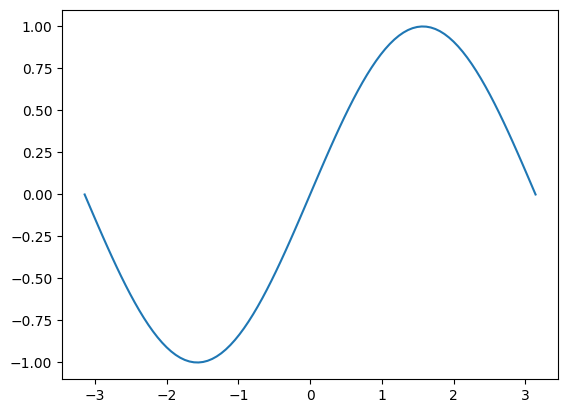

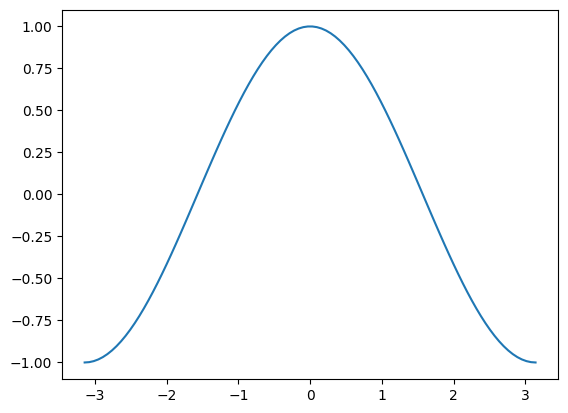

In [21]:
plt.plot(x, y)
plt.show()
plt.plot([1,2,3,4,5], [1,2,3,4,5]) #This one was hidden between the two since it was cleared!
plt.cla()
plt.plot(x, y1) #This shows both plots
plt.show()

You can also specify what figure to plot on

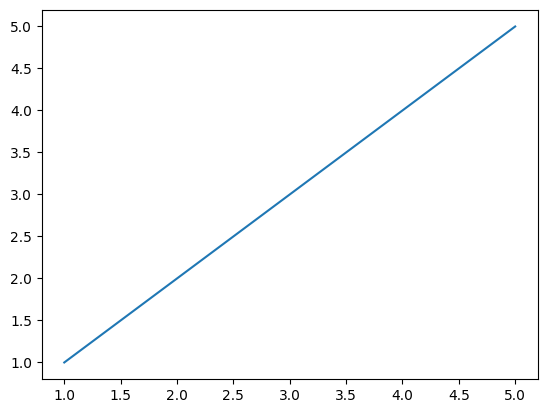

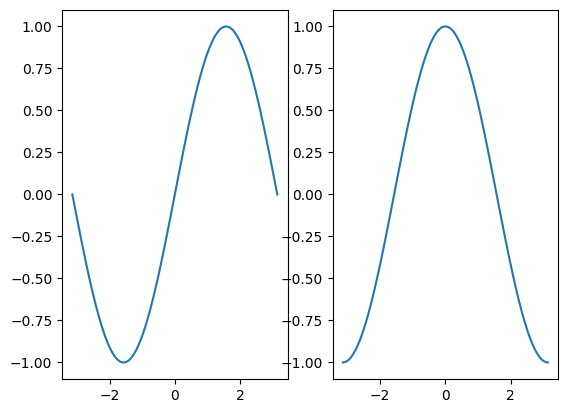

In [24]:
fig1, ax1 = plt.subplots(1, 1)
fig2, ax2 = plt.subplots(1, 2) #This makes an array of two axes
ax1.plot([1,2,3,4,5], [1,2,3,4,5])
ax2[0].plot(x,y)
ax2[1].plot(x, y1)

fig1.show()
fig2.show()

Now let's introduce stylistic choices that make Matplotlib look like CERN ROOT! This is useful for the standards that are usually in particle physics - and they also look nice :D

In [30]:
%%capture
#This suppresses all output so the screen isn't as filled
%pip install mplhep

In [38]:
import mplhep as hep
plt.style.use(hep.style.ROOT)
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (5,5)

mplhep is also different in a very important way - you can manipulate histograms that they use. I'll show you!

In [48]:
data = np.random.normal(0, 1, 1000) #make a randomlydistributed dataset

plotted_hist = plt.hist(data)
plt.close() #I just don't want to show the plot right now

print("Using matplotlib")
print(*plotted_hist, sep='\n')
print()
print("Using numpy")
raw_hist = np.histogram(data)
print(*raw_hist, sep='\n')

Using matplotlib
[  2.   5.  28. 115. 239. 280. 204. 104.  16.   7.]
[-4.01497248 -3.27961357 -2.54425467 -1.80889577 -1.07353687 -0.33817796
  0.39718094  1.13253984  1.86789875  2.60325765  3.33861655]
<BarContainer object of 10 artists>

Using numpy
[  2   5  28 115 239 280 204 104  16   7]
[-4.01497248 -3.27961357 -2.54425467 -1.80889577 -1.07353687 -0.33817796
  0.39718094  1.13253984  1.86789875  2.60325765  3.33861655]


The histogram is just a wrapper for the numpy histogram! They're exactly the same! In particle physics it's often required to manipulate histograms to get a scale factor or the integral or whatnot - and it's slower to have to make plots while making histograms.

Here is where mplhep comes in handy - it takes in the tuple generated by `np.histogram`

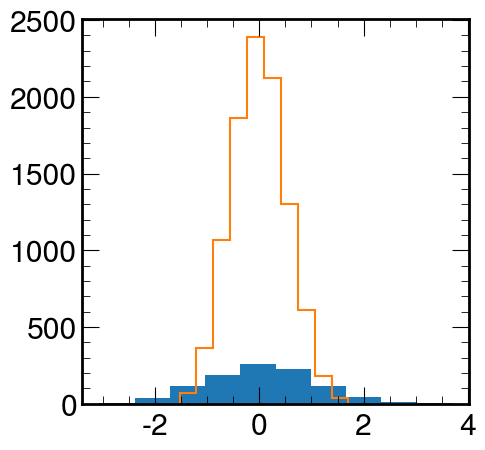

In [54]:
data = np.random.normal(0, 1, 1000) #make a randomlydistributed dataset
plt.hist(data)
data2 = np.random.normal(0, 0.5, 1000)

counts, bins = np.histogram(data2)
counts *= 10 #I can manipulate the histogram before plotting it!
hep.histplot( counts, bins )
plt.show()

This is not nearly everything you can do with python visualization. Feel free to use the space below to just try things that you want to try out - there are a ton of options.